# Churn Analysis
- In this project, we will investigate various data analysis techniques such as reading the data, dealing with null values dropping, merging data, applying visualisations, understanding the relationship between the features and how they may affect the target variable, and by doing so, we will answer a few research questions based on the analysis. Following that, we will utilise a Machine Learning Model to assess the correctness of our results. 

# Content
**1. Introduction**

**2. Date Wrangling** 

**3. Exploratory Data Analysis**

**4. Model**

**5. Conclusions & Observations**

# Research Questions:
1. What is the distribution of learners based on gender and country group?
2. Are there specific country groups or genders that exhibit higher retention rates?
3. How does the number of courses in a specialization affect retention?
4. Do learners with professional or gateway certificates exhibit different retention patterns?
5. Is there a correlation between the number of items completed and retention?
6. Can we identify any specific features that serve as strong predictors of retention?

# Importing Necessary Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import time
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import learning_curve

# Load & Read Dataset

In [2]:
df_train = pd.read_csv("/kaggle/input/dataanalysisprojectdataset/Churndataset/train.csv")
df_test = pd.read_csv("/kaggle/input/dataanalysisprojectdataset/Churndataset/test.csv")

In [3]:
df_train.head()

,ID,subscription_id,observation_dt,specialization_id,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,...,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity,is_retained
0,0,uCSOnoXPEeuYoxLqsPqz9Q,3/31/2021,fq9UWMbTEeqpthJ2RmWGow,6,Business,True,True,43,Non-Brazil Latin America,...,1,14,1,False,2.183333,3.15,1,2,5,1
1,1,V4PxnHbyEeumYRI8KH34Iw,9/13/2021,qq9MIGMFEeayMBJXAbQCnw,4,Personal Development,False,False,587,United States,...,0,0,0,False,3.416667,0.00,6,0,154,1
2,2,9HAj5Up9EeyK2wpiVBks6w,6/17/2022,fgru9YzjEeeQDBJk5_hT6g,4,Computer Science,False,False,1389,Africa and developing Middle East,...,0,0,0,False,6.800000,0.00,9,0,149,1
3,3,GPLkmL4EEeu3lQ5CLnXusw,3/9/2022,jYbE6QjjEeuxFA6_GejhAQ,6,Data Science,True,False,287,East Asia,...,0,0,0,False,2.800000,0.00,7,0,19,1
4,4,bIrCb6x7EeueXApGJfZIEw,6/5/2021,kr43OcbTEeqeNBKhfgCLyw,8,Data Science,True,True,35,United States,...,0,0,0,False,32.500000,0.00,17,0,3,0


# Check for data types, check for null values..etc

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331162 entries, 0 to 331161
Data columns (total 38 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   ID                                                331162 non-null  int64  
 1   subscription_id                                   331162 non-null  object 
 2   observation_dt                                    331162 non-null  object 
 3   specialization_id                                 331162 non-null  object 
 4   cnt_courses_in_specialization                     331162 non-null  int64  
 5   specialization_domain                             331162 non-null  object 
 6   is_professional_certificate                       331162 non-null  bool   
 7   is_gateway_certificate                            331162 non-null  bool   
 8   learner_days_since_registration                   331162 non-null  int64  
 9   lear

In [5]:
df_train.isna().sum()

ID                                                  0
subscription_id                                     0
observation_dt                                      0
specialization_id                                   0
cnt_courses_in_specialization                       0
specialization_domain                               0
is_professional_certificate                         0
is_gateway_certificate                              0
learner_days_since_registration                     0
learner_country_group                               0
learner_gender                                      0
learner_cnt_other_courses_active                    0
learner_cnt_other_courses_paid_active               0
learner_cnt_other_courses_items_completed           0
learner_cnt_other_courses_paid_items_completed      0
learner_cnt_other_transactions_past                 0
learner_other_revenue                               0
subscription_period_order                           0
days_since_last_payment     

# Drop Some Unnecessary Features

In [6]:
df_train = df_train.drop(['ID', 'subscription_id', 'specialization_id'], axis=1)
df_train.head()

,observation_dt,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,learner_gender,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,...,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity,is_retained
0,3/31/2021,6,Business,True,True,43,Non-Brazil Latin America,male,1,1,...,1,14,1,False,2.183333,3.15,1,2,5,1
1,9/13/2021,4,Personal Development,False,False,587,United States,female,1,0,...,0,0,0,False,3.416667,0.00,6,0,154,1
2,6/17/2022,4,Computer Science,False,False,1389,Africa and developing Middle East,unknown,1,0,...,0,0,0,False,6.800000,0.00,9,0,149,1
3,3/9/2022,6,Data Science,True,False,287,East Asia,unknown,0,0,...,0,0,0,False,2.800000,0.00,7,0,19,1
4,6/5/2021,8,Data Science,True,True,35,United States,unknown,0,0,...,0,0,0,False,32.500000,0.00,17,0,3,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331162 entries, 0 to 331161
Data columns (total 35 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   observation_dt                                    331162 non-null  object 
 1   cnt_courses_in_specialization                     331162 non-null  int64  
 2   specialization_domain                             331162 non-null  object 
 3   is_professional_certificate                       331162 non-null  bool   
 4   is_gateway_certificate                            331162 non-null  bool   
 5   learner_days_since_registration                   331162 non-null  int64  
 6   learner_country_group                             331162 non-null  object 
 7   learner_gender                                    331162 non-null  object 
 8   learner_cnt_other_courses_active                  331162 non-null  int64  
 9   lear

In [8]:
df_train.head()

,observation_dt,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,learner_gender,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,...,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity,is_retained
0,3/31/2021,6,Business,True,True,43,Non-Brazil Latin America,male,1,1,...,1,14,1,False,2.183333,3.15,1,2,5,1
1,9/13/2021,4,Personal Development,False,False,587,United States,female,1,0,...,0,0,0,False,3.416667,0.00,6,0,154,1
2,6/17/2022,4,Computer Science,False,False,1389,Africa and developing Middle East,unknown,1,0,...,0,0,0,False,6.800000,0.00,9,0,149,1
3,3/9/2022,6,Data Science,True,False,287,East Asia,unknown,0,0,...,0,0,0,False,2.800000,0.00,7,0,19,1
4,6/5/2021,8,Data Science,True,True,35,United States,unknown,0,0,...,0,0,0,False,32.500000,0.00,17,0,3,0


# **What is the distribution of learners based on gender and country group?**

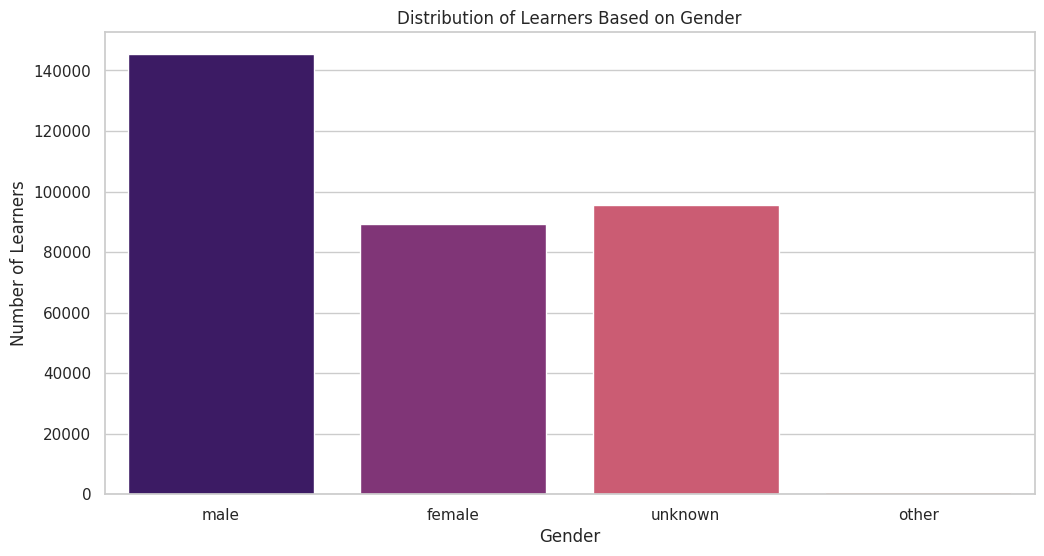

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x="learner_gender", data=df_train, palette="magma")
plt.title("Distribution of Learners Based on Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Learners")
plt.show()

In [10]:
df_train["learner_gender"].value_counts()

learner_gender
male       145353
unknown     95686
female      89252
other         871
Name: count, dtype: int64

In [11]:
Ratio_female = (145353/89252)/3
Ratio_male = (145353/89252)- Ratio_female
unknown_count = 95686
female_count = int(unknown_count * (Ratio_female / (1 + Ratio_female)))
male_count = unknown_count - female_count

gender = ['female'] * female_count + ['male'] * male_count
np.random.shuffle(gender)  # Shuffle the list 

unknown_vlaues = (df_train['learner_gender'] == 'unknown')
df_train.loc[unknown_vlaues, 'learner_gender'] = gender



In [12]:
df_train.learner_gender.value_counts()

learner_gender
male      207372
female    122919
other        871
Name: count, dtype: int64

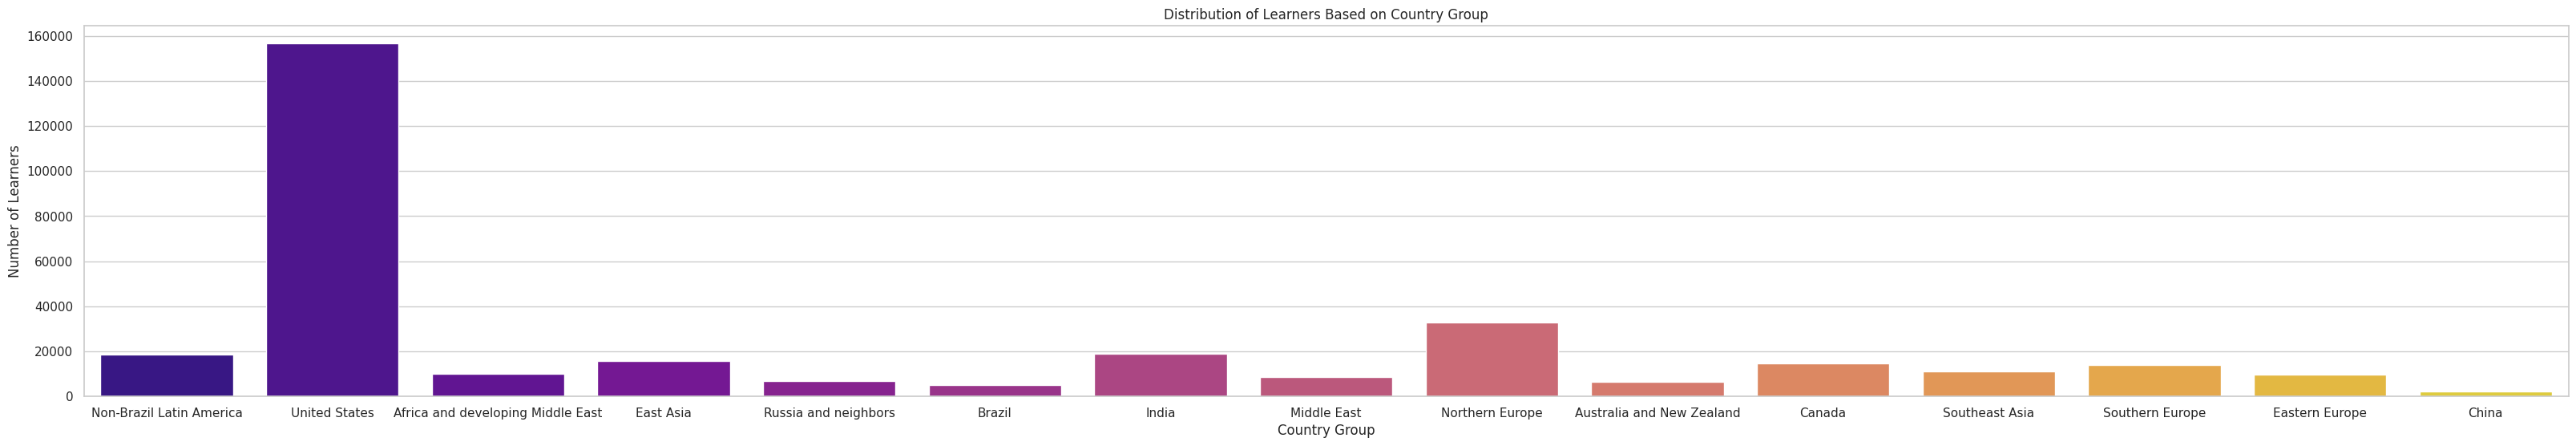

In [13]:
plt.figure(figsize=(40, 6))
sns.countplot(x="learner_country_group", data=df_train, palette="plasma")
plt.title("Distribution of Learners Based on Country Group")
plt.xlabel("Country Group")
plt.ylabel("Number of Learners")
plt.show()

- The visualisations show a clear gender and country group distribution among learners. Males make up the majority of learners in the gender-based distribution, followed by unknown and finally females. This shows that males participate in the learning process at a higher rate.
- As for the country-based distribution, United States accounts for the majority of learners. This implies that learners from the United States are actively participating in the learning activities.

# **Are there specific country groups or genders that exhibit higher retention rates?**

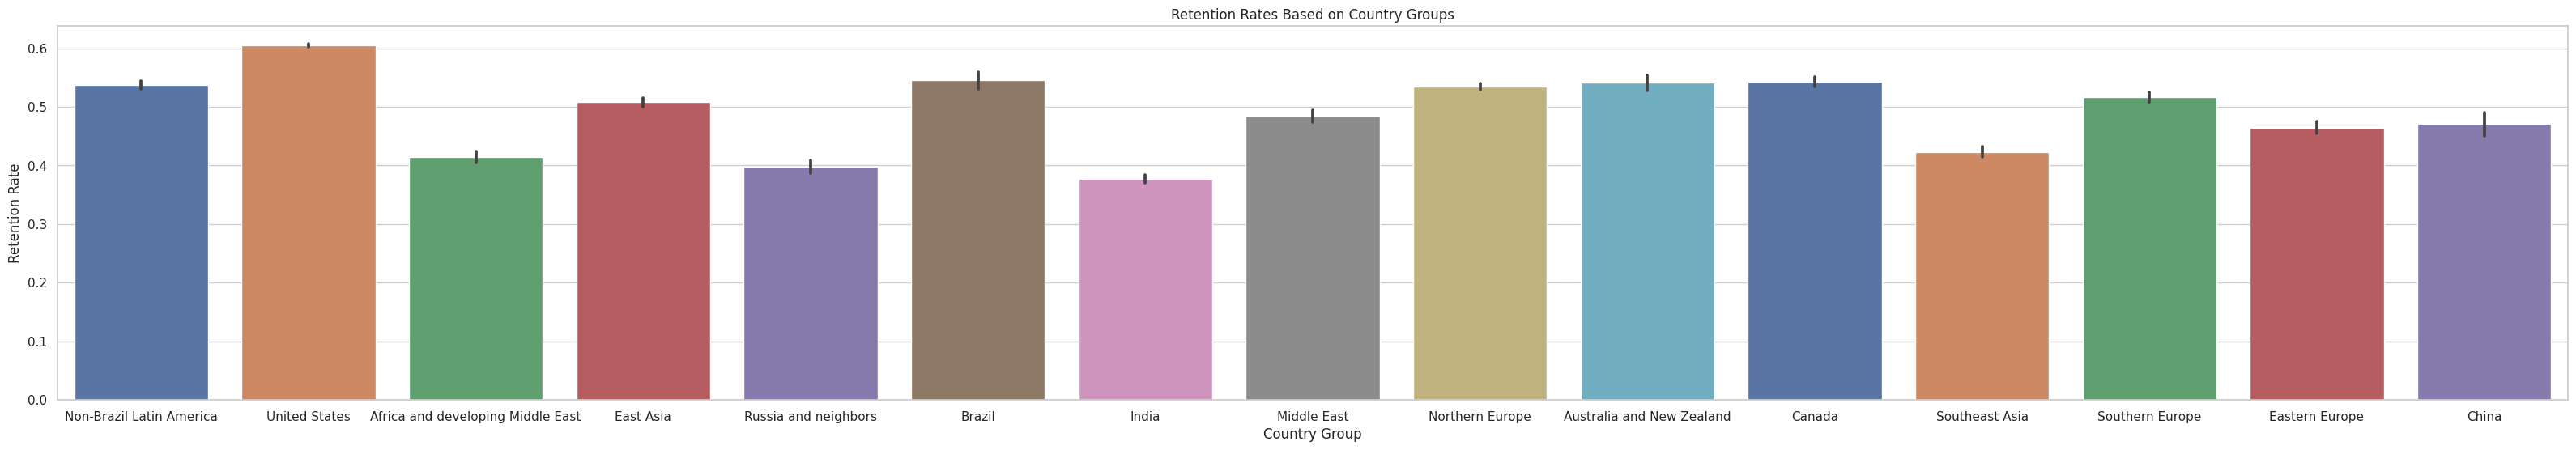

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(40, 6))
sns.barplot(x="learner_country_group", y="is_retained", data=df_train, palette="deep")
plt.title("Retention Rates Based on Country Groups")
plt.xlabel("Country Group")
plt.ylabel("Retention Rate")
plt.show()

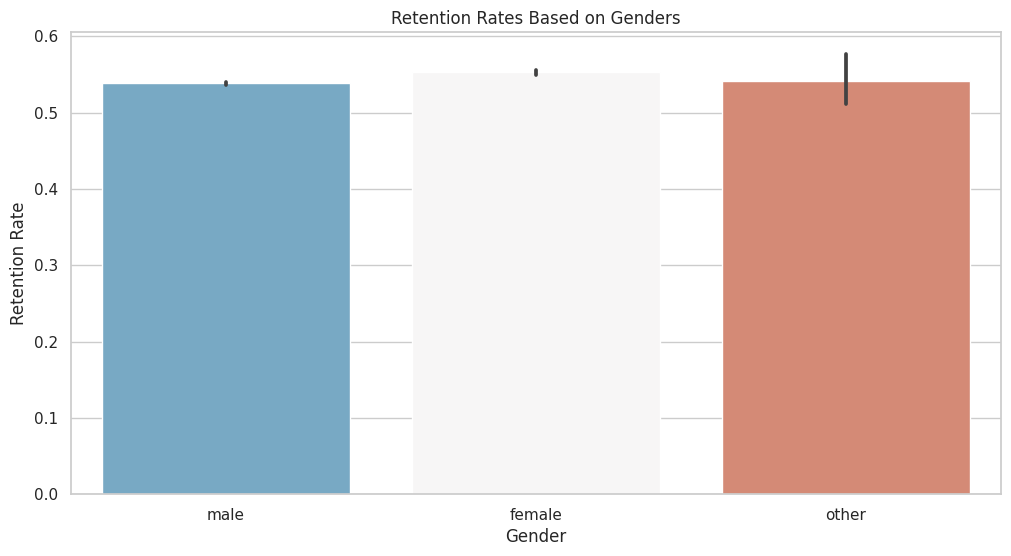

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x="learner_gender", y="is_retained", data=df_train, palette="RdBu_r")
plt.title("Retention Rates Based on Genders")
plt.xlabel("Gender")
plt.ylabel("Retention Rate")
plt.show()

- The visualisation of data gives an observations of the retention rates across various nation groups and genders. The United States, in particular, appears as the country with the greatest retention rates, indicating a high degree of involvement among its members.
- Females exceed males in terms of retention rates, according to gender-based data. This implies that the techniques, content, or atmosphere may connect more successfully with females, resulting in increased retention. 

# **How does the number of courses in a specialization affect retention?**

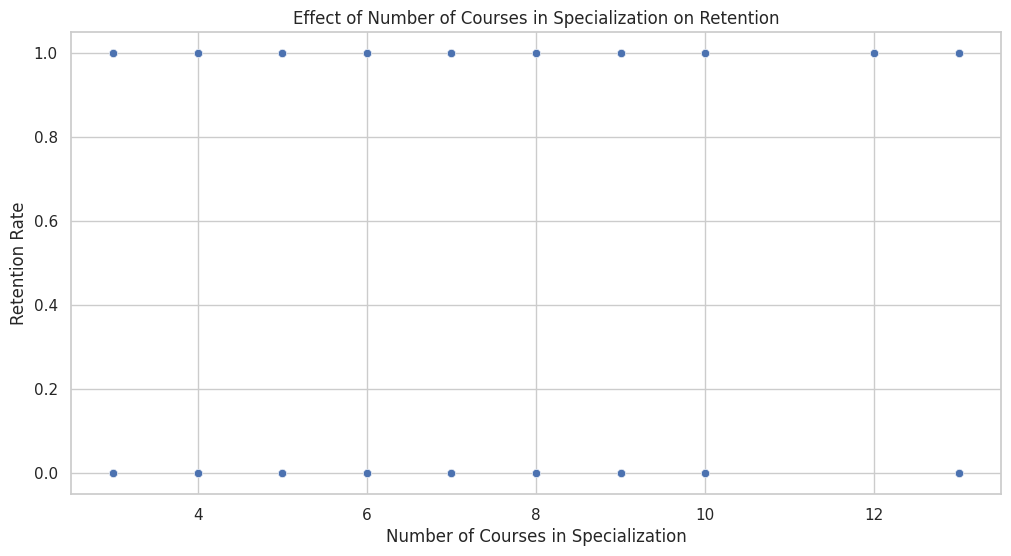

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x="cnt_courses_in_specialization", y="is_retained", data=df_train, alpha=0.9)
plt.title("Effect of Number of Courses in Specialization on Retention")
plt.xlabel("Number of Courses in Specialization")
plt.ylabel("Retention Rate")
plt.show()

- The visualisation plots the retention rate against the number of courses in a specialisation. However, the graph lacks a clear pattern, suggesting that the link between the number of courses in a specialisation & the retention rate may not be linear.

# **Do learners with professional or gateway certificates exhibit different retention patterns?**

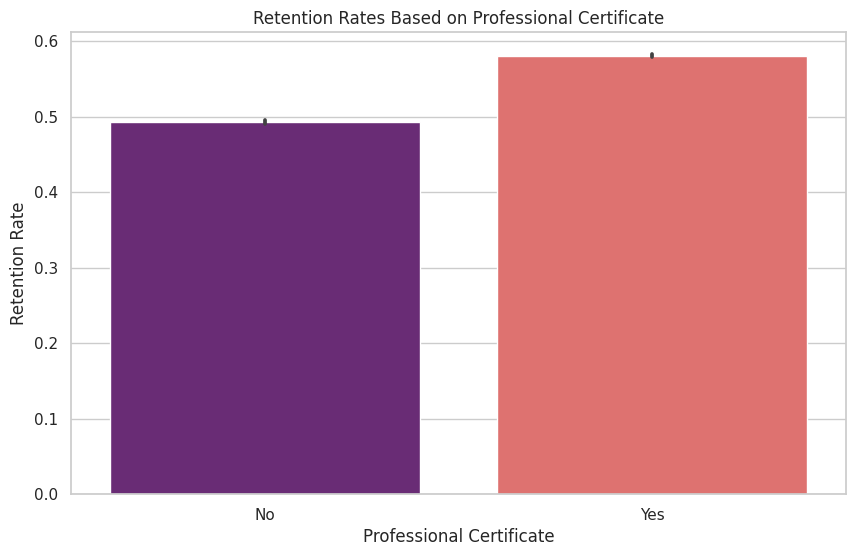

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="is_professional_certificate", y="is_retained", data=df_train, palette="magma")
plt.title("Retention Rates Based on Professional Certificate")
plt.xlabel("Professional Certificate")
plt.ylabel("Retention Rate")
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()

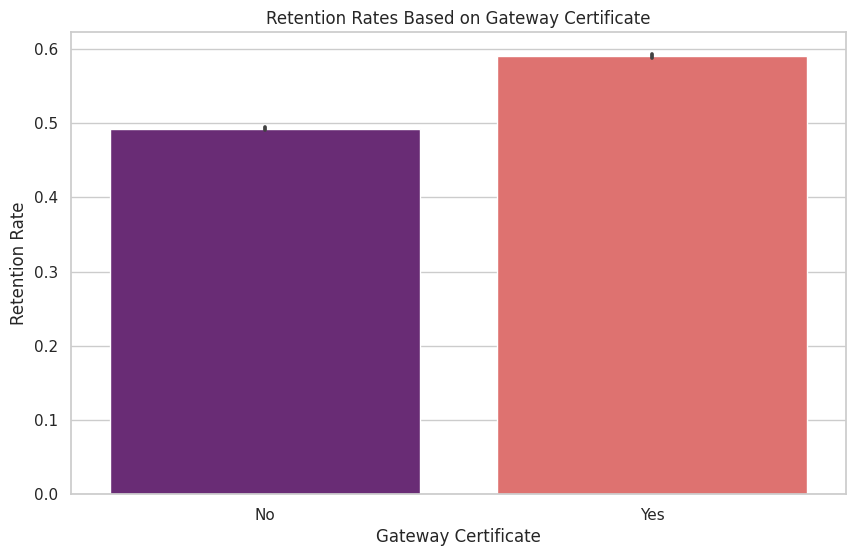

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x="is_gateway_certificate", y="is_retained", data=df_train, palette="magma")
plt.title("Retention Rates Based on Gateway Certificate")
plt.xlabel("Gateway Certificate")
plt.ylabel("Retention Rate")
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()

- The visualizations shows that learners with professional or gateway certificates tend to exhibit higher retention rates compared to those without such certificates.

# **Is there a correlation between the number of items completed and retention?**

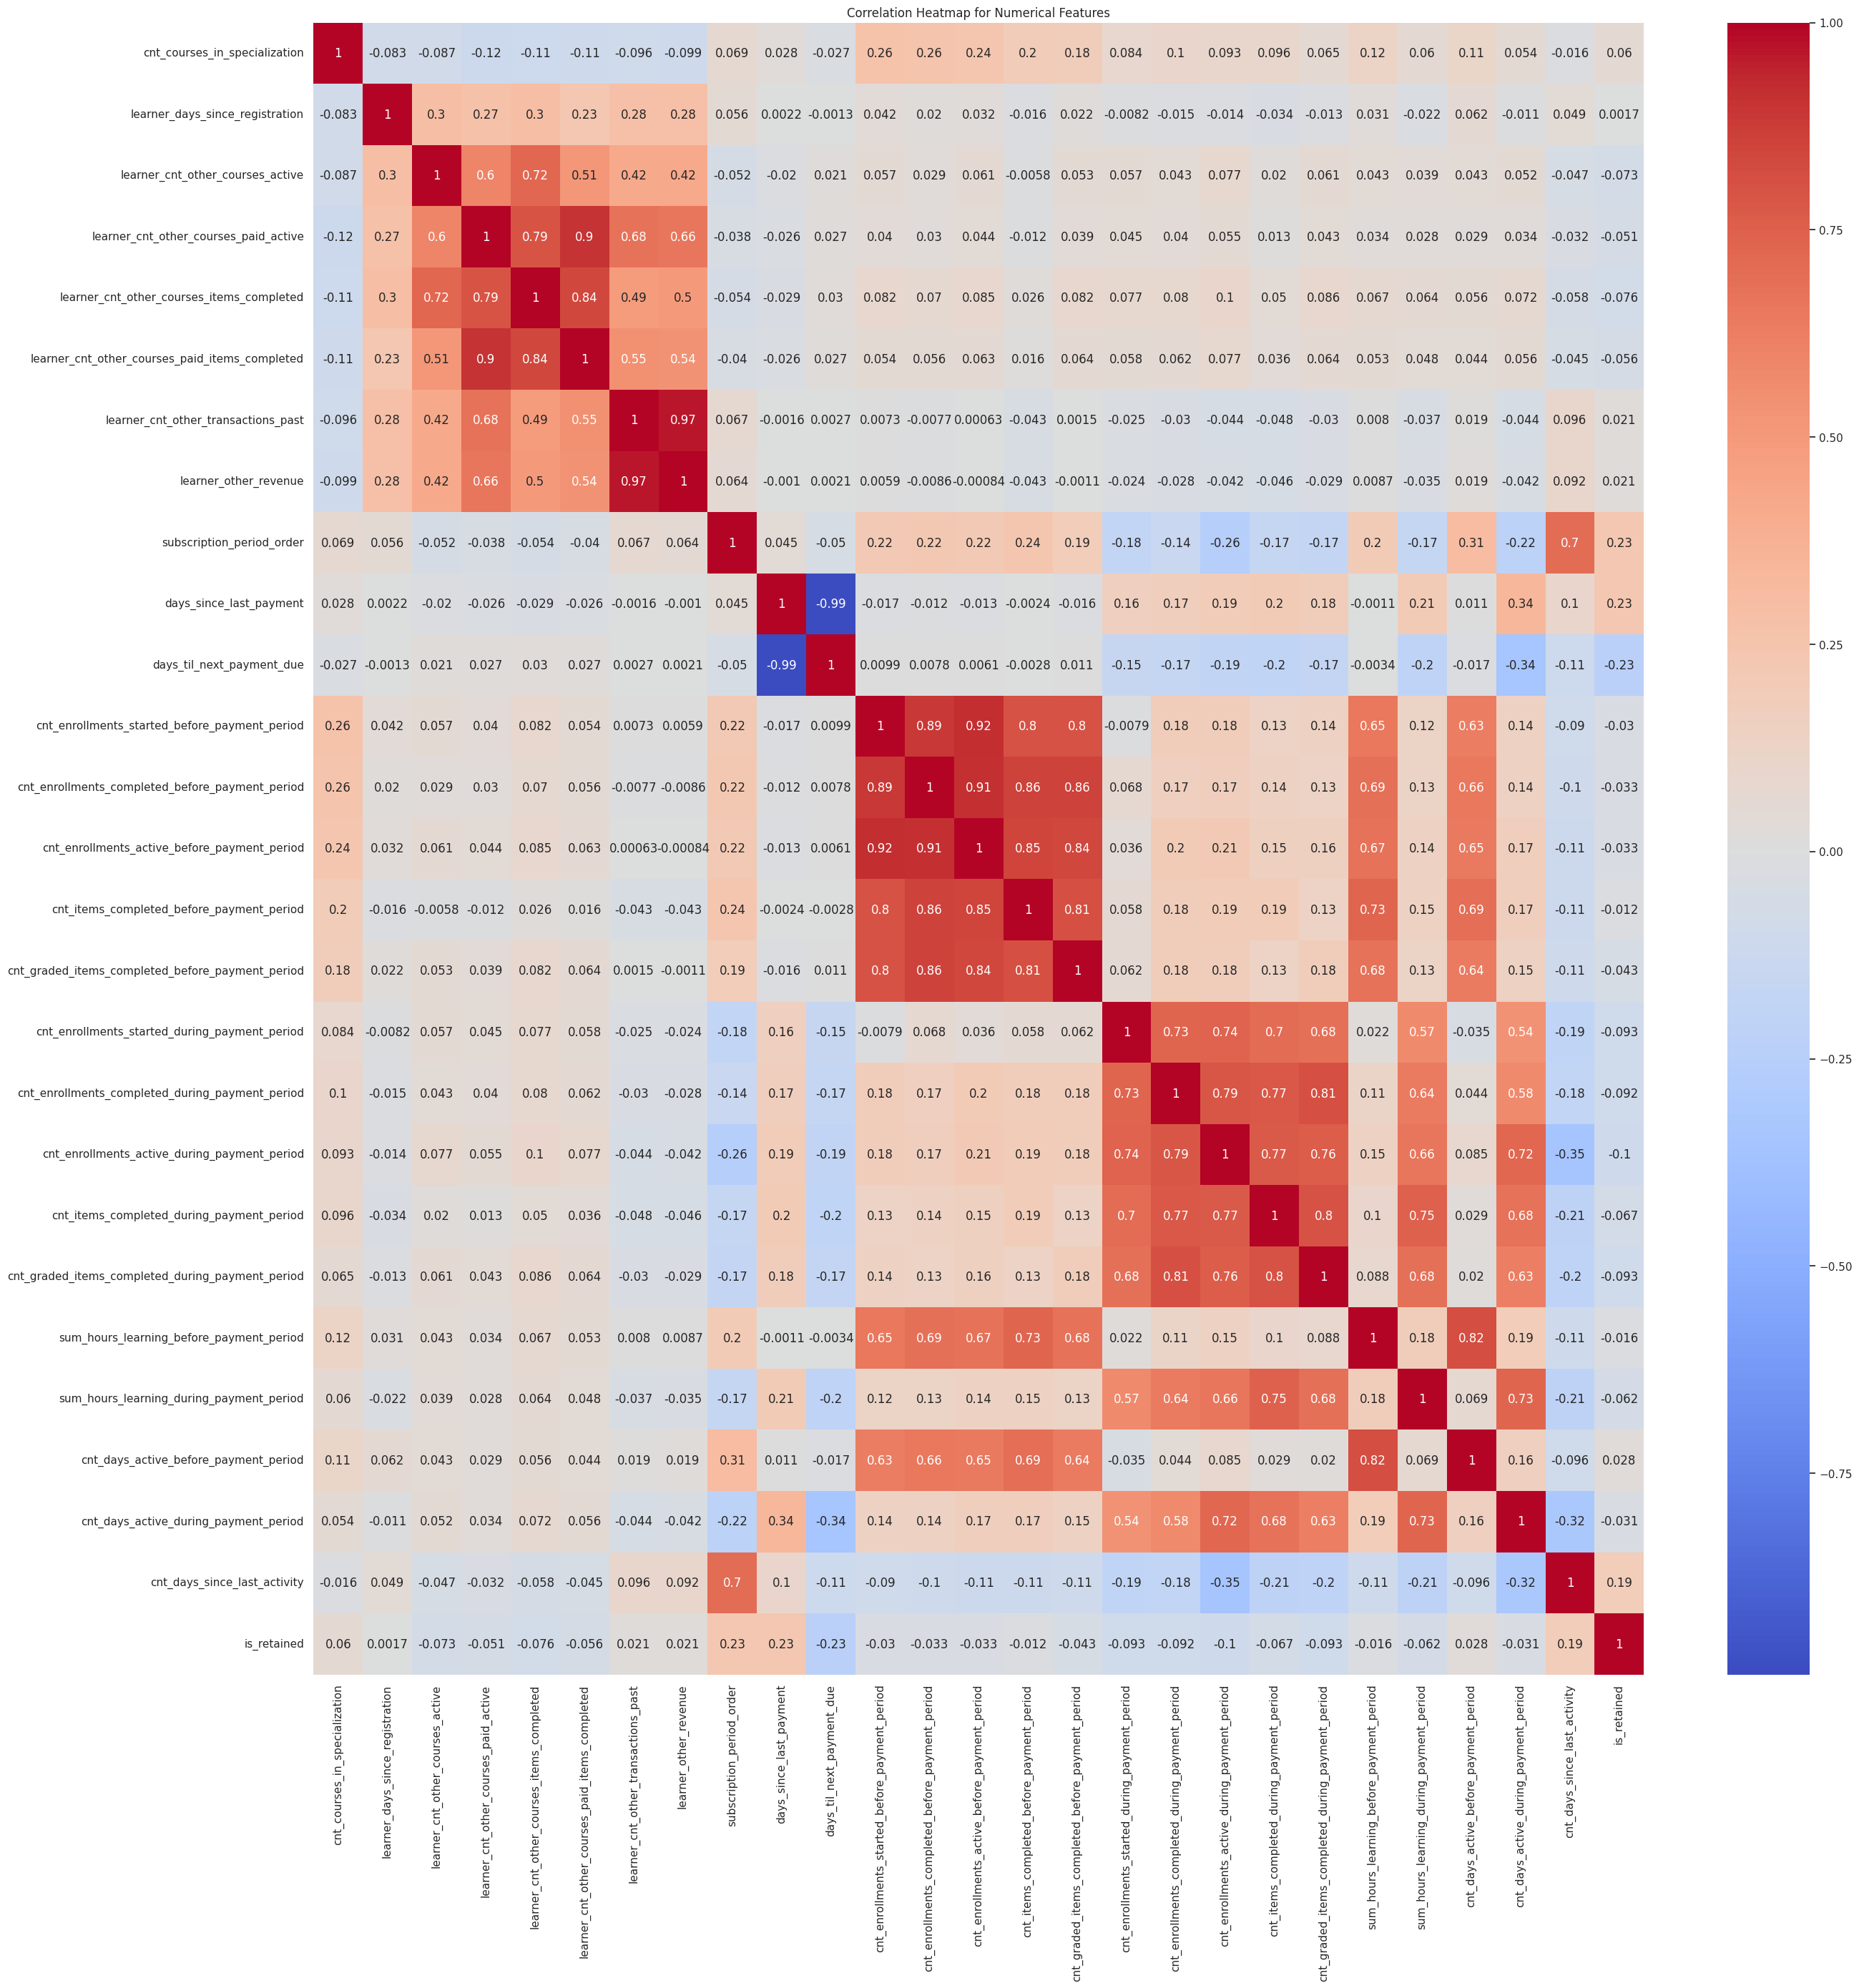

In [19]:
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
numerical_df = df_train[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

- Based on the correclation matrix above we can see that there is a weak correlation between number of items completed & retention. There correlation value is -0.076.

# Are there anny outliers?

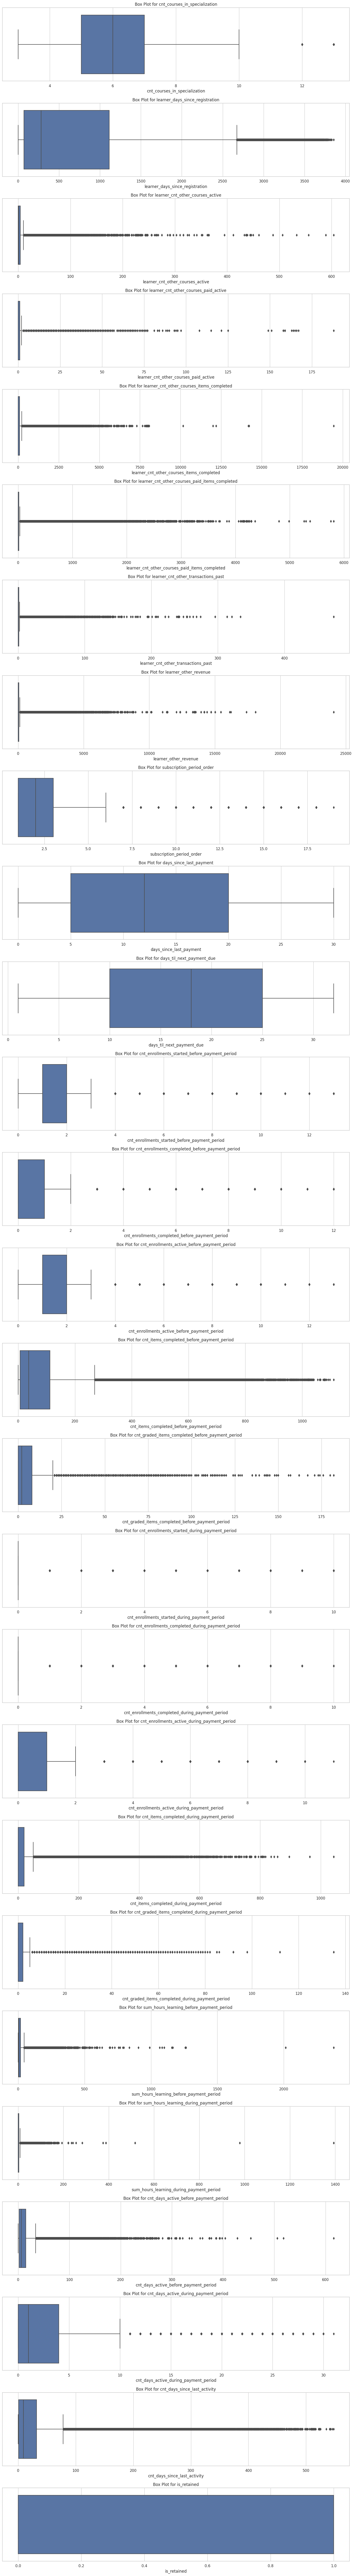

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for plotting
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Plot each numerical column in a separate subplot
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(15, 4 * len(numerical_columns)))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_train[column], ax=axes[i])
    axes[i].set_title(f"Box Plot for {column}")
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

In [21]:
# Select numerical columns for outlier removal
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers using IQR
df_train = remove_outliers_iqr(df_train, numerical_columns)

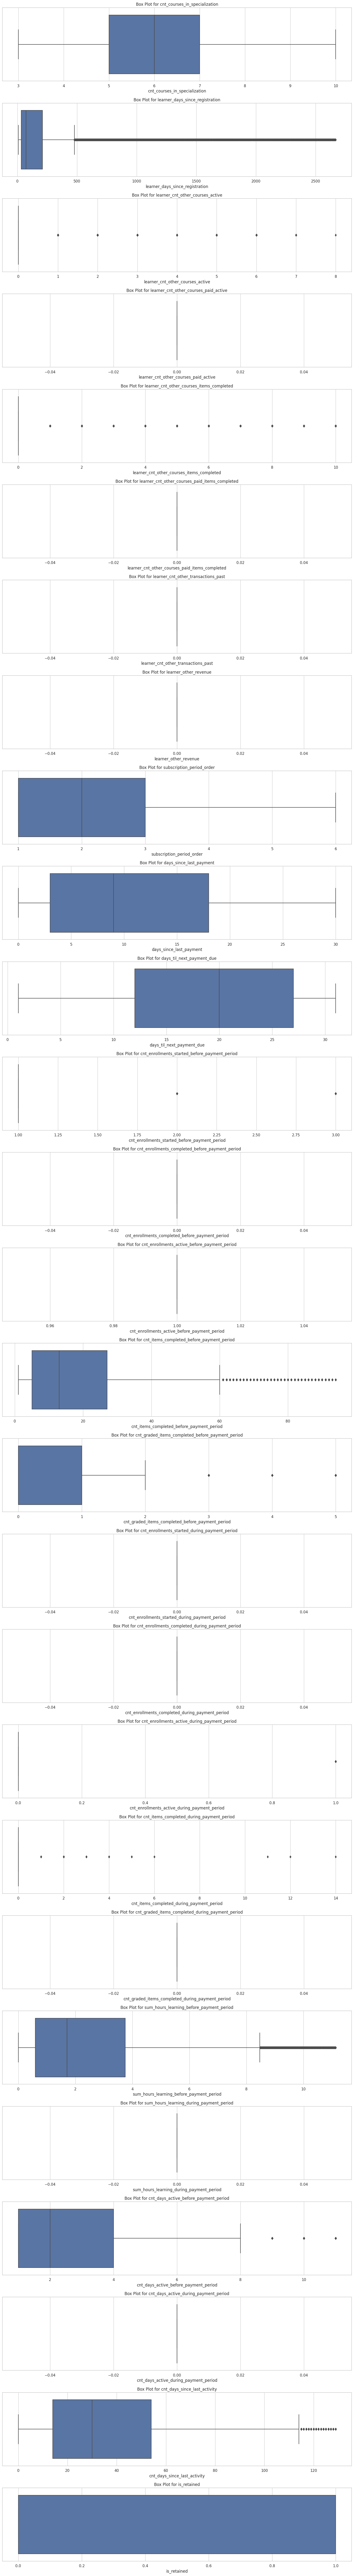

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for plotting
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Plot each numerical column in a separate subplot
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(15, 4 * len(numerical_columns)))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_train[column], ax=axes[i])
    axes[i].set_title(f"Box Plot for {column}")
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

As we can see there are outliers in most of the numerical comlumns and we romoved them using IQR 

# **Can we identify any specific features that serve as strong predictors of retention?**

In [23]:
# Convert Data Types
df_train["observation_dt"] = pd.to_datetime(df_train["observation_dt"])
df_train["learner_gender"] = df_train["learner_gender"].astype("category")

# Feature Engineering
df_train["days_since_registration"] = (pd.Timestamp.now() - df_train["observation_dt"]).dt.days

# Encoding Categorical Variables (One-Hot Encoding)
df_train = pd.get_dummies(df_train, columns=["specialization_domain", "learner_country_group", "learner_gender", "subscription_period_order"])

# Handling Boolean Columns
boolean_columns = ["is_professional_certificate", "is_gateway_certificate", "is_subscription_started_with_free_trial", "is_active_capstone_during_pay_period"]
df_train[boolean_columns] = df_train[boolean_columns].astype(bool)

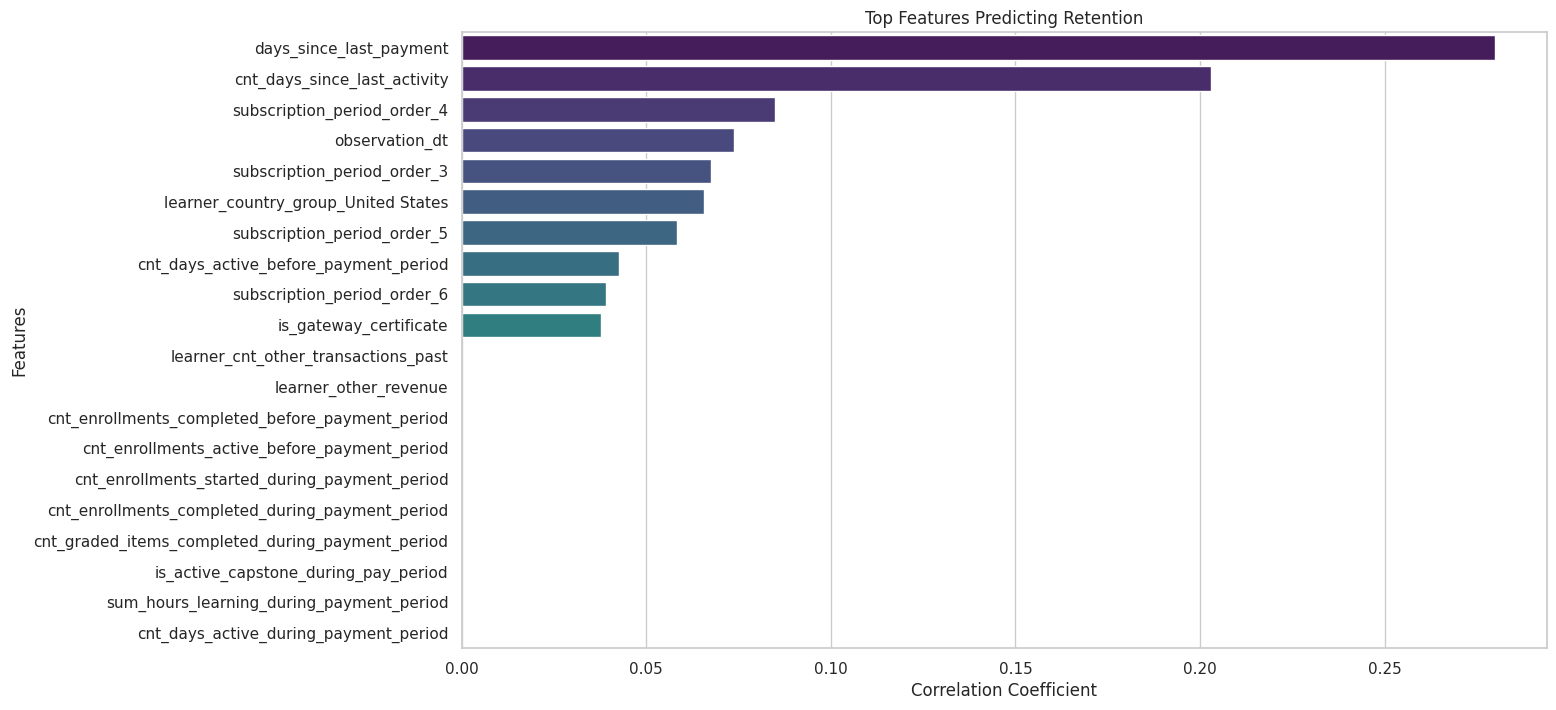

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_with_retention = df_train.corr()['is_retained'].sort_values(ascending=False)
top_positive_features = correlation_with_retention[1:11]
top_negative_features = correlation_with_retention[-10:]
top_features = pd.concat([top_positive_features, top_negative_features])
plt.figure(figsize=(14, 8))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top Features Predicting Retention")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

- Based on this visualization; we calculated the correlation coefficients between features & retention then selected the top features with high positive correlation and selected top features with high negative correlation, concatenated the features then finally plotted them.
- As we can see the "subscription_period_order has a very high correclation with retention and "days_tol_next_payment_due" has a very weak correlation with retention.

# Analyzing Time Series: Monthly Retention Rate Trends

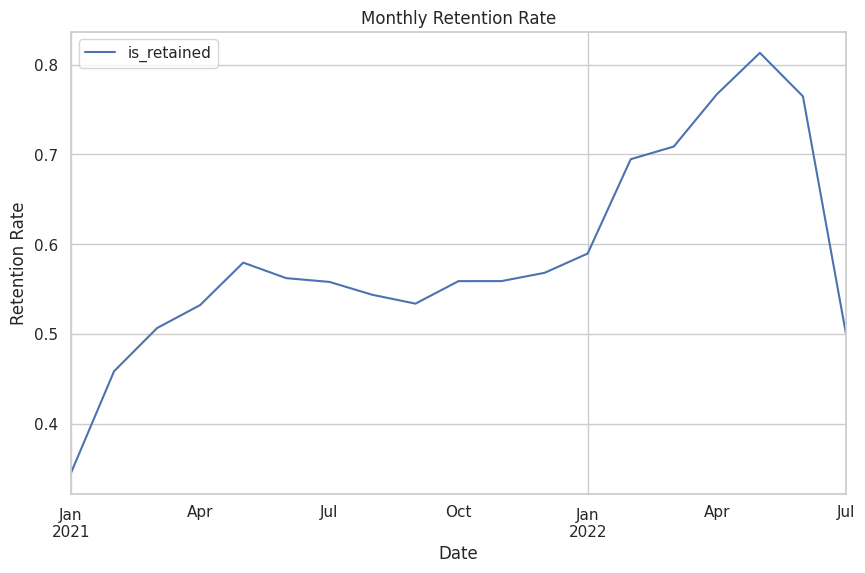

In [25]:
df_train["observation_dt"] = pd.to_datetime(df_train["observation_dt"])
df_train.set_index("observation_dt", inplace=True)
df_train.resample("M").mean().plot(y="is_retained", figsize=(10, 6))
plt.title("Monthly Retention Rate")
plt.xlabel("Date")
plt.ylabel("Retention Rate")
plt.show();

- The "Monthly Retention Rate" time series visualization indicates a significant upward trend in retention rates from January 2021 to July 2022, suggesting an improvement in user retention over this period.

Checking the balance for the predictive value


In [26]:
df_train['is_retained'].value_counts()

is_retained
1    17895
0    14181
Name: count, dtype: int64

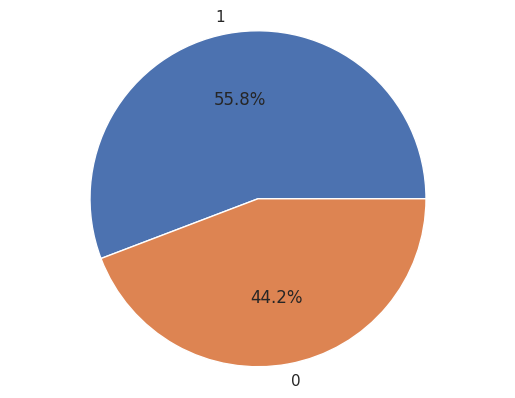

In [27]:

column_values = df_train['is_retained'].value_counts()

plt.pie(column_values, labels=column_values.index, autopct='%1.1f%%')
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

# Training a catboost classifier

In [28]:
# Splitting the data into features (X) and target (y)
y = df_train['is_retained']
X = df_train.drop('is_retained', axis=1)
# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Training: CatBoostClassifier with Custom Parameters
catboost_params = {
    'iterations': 1000,
    'learning_rate': 0.05,
    'depth': 8,
    'l2_leaf_reg': 5,
    'verbose': 100,
    'random_state': 42
}
model = CatBoostClassifier(**catboost_params)
model.fit(X_train, y_train)

0:	learn: 0.6868080	total: 59.8ms	remaining: 59.8s
100:	learn: 0.5998106	total: 1.3s	remaining: 11.6s
200:	learn: 0.5788466	total: 2.51s	remaining: 9.99s
300:	learn: 0.5560599	total: 3.72s	remaining: 8.64s
400:	learn: 0.5357784	total: 5.05s	remaining: 7.54s
500:	learn: 0.5167815	total: 6.33s	remaining: 6.3s
600:	learn: 0.4994977	total: 7.58s	remaining: 5.03s
700:	learn: 0.4834239	total: 8.82s	remaining: 3.76s
800:	learn: 0.4671102	total: 10.1s	remaining: 2.51s
900:	learn: 0.4527239	total: 11.3s	remaining: 1.24s
999:	learn: 0.4399038	total: 12.5s	remaining: 0us


# plot the learning curve for CatBoostClassifier

0:	learn: 0.6863958	total: 4.69ms	remaining: 4.69s
100:	learn: 0.4719868	total: 357ms	remaining: 3.18s
200:	learn: 0.3614905	total: 726ms	remaining: 2.88s
300:	learn: 0.2770237	total: 1.09s	remaining: 2.53s
400:	learn: 0.2205272	total: 1.46s	remaining: 2.18s
500:	learn: 0.1774241	total: 1.83s	remaining: 1.83s
600:	learn: 0.1443608	total: 2.2s	remaining: 1.46s
700:	learn: 0.1190849	total: 2.6s	remaining: 1.11s
800:	learn: 0.0993815	total: 2.97s	remaining: 738ms
900:	learn: 0.0834365	total: 3.36s	remaining: 369ms
999:	learn: 0.0720535	total: 3.73s	remaining: 0us
0:	learn: 0.6878465	total: 4.7ms	remaining: 4.7s
100:	learn: 0.5476578	total: 522ms	remaining: 4.65s
200:	learn: 0.4880270	total: 1.04s	remaining: 4.15s
300:	learn: 0.4267632	total: 1.57s	remaining: 3.65s
400:	learn: 0.3802752	total: 2.1s	remaining: 3.13s
500:	learn: 0.3407320	total: 2.61s	remaining: 2.6s
600:	learn: 0.3069989	total: 3.14s	remaining: 2.08s
700:	learn: 0.2779867	total: 3.66s	remaining: 1.56s
800:	learn: 0.2535089	

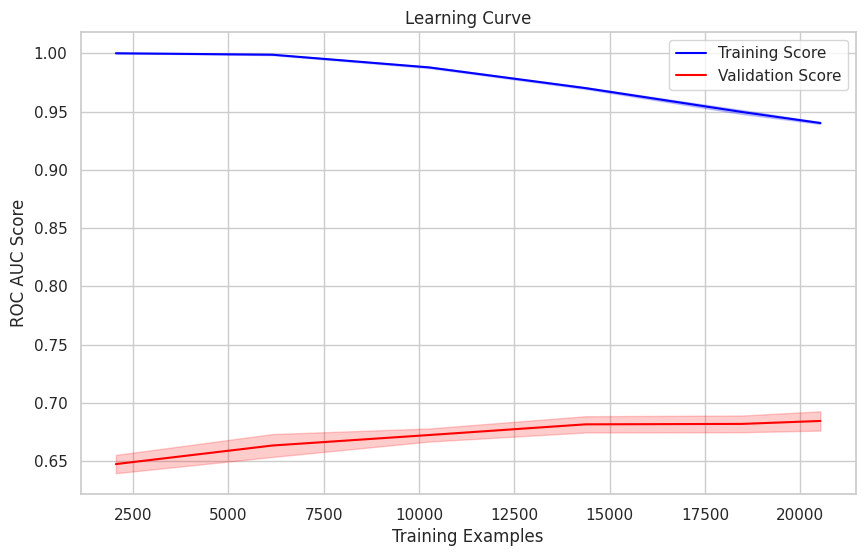

In [29]:
from sklearn.model_selection import learning_curve

# Define the learning curve function
def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='roc_auc', shuffle=True, random_state=42
    )

    # Calculate mean and standard deviation for training set scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')

    plt.plot(train_sizes, test_scores_mean, label='Validation Score', color='red')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')

    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('ROC AUC Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Set the training sizes for the learning curve
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

# Plot the learning curve for the CatBoostClassifier
plot_learning_curve(model, X_train, y_train, cv=5, train_sizes=train_sizes)

# Cross-Validation and Performance Evaluation using ROC AUC Scores

In [30]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-Validation ROC AUC Scores:", cv_scores)
print("Mean CV ROC AUC:", np.mean(cv_scores))
print("Standard Deviation of CV ROC AUC:", np.std(cv_scores))

0:	learn: 0.6867930	total: 12ms	remaining: 12s
100:	learn: 0.5935386	total: 1.14s	remaining: 10.1s
200:	learn: 0.5685892	total: 2.28s	remaining: 9.08s
300:	learn: 0.5413887	total: 3.43s	remaining: 7.96s
400:	learn: 0.5169125	total: 4.58s	remaining: 6.84s
500:	learn: 0.4943427	total: 5.76s	remaining: 5.74s
600:	learn: 0.4750500	total: 6.9s	remaining: 4.58s
700:	learn: 0.4578603	total: 8.07s	remaining: 3.44s
800:	learn: 0.4408442	total: 9.25s	remaining: 2.3s
900:	learn: 0.4249060	total: 10.4s	remaining: 1.14s
999:	learn: 0.4101204	total: 11.5s	remaining: 0us
0:	learn: 0.6871134	total: 11.2ms	remaining: 11.2s
100:	learn: 0.5957249	total: 1.16s	remaining: 10.3s
200:	learn: 0.5707789	total: 2.34s	remaining: 9.3s
300:	learn: 0.5436711	total: 3.5s	remaining: 8.13s
400:	learn: 0.5204785	total: 4.67s	remaining: 6.97s
500:	learn: 0.4992880	total: 5.81s	remaining: 5.79s
600:	learn: 0.4792505	total: 6.98s	remaining: 4.63s
700:	learn: 0.4605972	total: 8.16s	remaining: 3.48s
800:	learn: 0.4436364	to

# Model Evaluation on Validation Set: Accuracy and Classification Report

In [31]:
# Model Evaluation on Validation Set
y_pred_probs = model.predict_proba(X_val)[:, 1]

y_pred = (y_pred_probs > 0.5).astype(int)
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6382481296758105
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.49      0.54      2837
           1       0.65      0.76      0.70      3579

    accuracy                           0.64      6416
   macro avg       0.63      0.62      0.62      6416
weighted avg       0.63      0.64      0.63      6416



# Second Model: Random Forest


In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)
roc_auc_scores = cross_val_score(RF, X_train, y_train, cv=5, scoring='roc_auc')
RF.fit(X_train, y_train)

print("Cross-Validation ROC AUC Scores:", roc_auc_scores)
print("Mean CV ROC AUC:", roc_auc_scores.mean())
print("Standard Deviation of CV ROC AUC:", np.std(roc_auc_scores))

Cross-Validation ROC AUC Scores: [0.66924155 0.68041987 0.68067418 0.66807255 0.69246447]
Mean CV ROC AUC: 0.6781745245716305
Standard Deviation of CV ROC AUC: 0.00891448655625549


In [33]:
predictions = RF.predict_proba(X_val)[:, 1]
y_pred_RF = (predictions > 0.5).astype(int)
accuracyRF = accuracy_score(y_val, y_pred_RF)
classification = classification_report(y_val, y_pred_RF)

print(f'Accuracy: {accuracyRF}')
print(f'Classification Report:\n{classification}')

Accuracy: 0.6334164588528678
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.51      0.55      2837
           1       0.65      0.73      0.69      3579

    accuracy                           0.63      6416
   macro avg       0.63      0.62      0.62      6416
weighted avg       0.63      0.63      0.63      6416



# Test Data Preprocessing and Feature Engineering Pipeline

In [34]:
# Remove Unnecessary Columns
df_test = df_test.drop(columns= "subscription_id")
df_test = df_test.drop(columns="Unnamed: 0")
df_test = df_test.drop(columns="specialization_id")

# Handle Missing Data
df_test.fillna(0, inplace=True)

# Convert Data Types
df_test["observation_dt"] = pd.to_datetime(df_test["observation_dt"])
df_test["learner_gender"] = df_test["learner_gender"].astype("category")

# Feature Engineering
df_test["days_since_registration"] = (pd.Timestamp.now() - df_test["observation_dt"]).dt.days

# Encoding Categorical Variables (One-Hot Encoding)
df_test = pd.get_dummies(df_test, columns=["specialization_domain", "learner_country_group", "learner_gender", "subscription_period_order"])

# Ensure categorical columns have the same names as in the training data
for col in df_test.columns:
    if col not in df_test.columns:
        df_test[col] = 0

# Handling Boolean Columns
boolean_columns = ["is_professional_certificate", "is_gateway_certificate", "is_subscription_started_with_free_trial", "is_active_capstone_during_pay_period"]
df_test[boolean_columns] = df_test[boolean_columns].astype(bool)

# Generating Predictions for Test Data and Creating Submission CSV

In [35]:
test_pred_probs = model.predict(df_test)

# Create a submission DataFrame with new index column and TARGET column
submission = pd.DataFrame({
    'TARGET': test_pred_probs
})

# Create a new index column
submission['ID'] = submission.index

# Reorder columns to have the index column first
submission = submission[['ID', 'TARGET']]

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

submission

,ID,TARGET
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
82786,82786,1
82787,82787,0
82788,82788,1
82789,82789,1
